In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
Date             145460 non-null object
Location         145460 non-null object
MinTemp          143975 non-null float64
MaxTemp          144199 non-null float64
Rainfall         142199 non-null float64
Evaporation      82670 non-null float64
Sunshine         75625 non-null float64
WindGustDir      135134 non-null object
WindGustSpeed    135197 non-null float64
WindDir9am       134894 non-null object
WindDir3pm       141232 non-null object
WindSpeed9am     143693 non-null float64
WindSpeed3pm     142398 non-null float64
Humidity9am      142806 non-null float64
Humidity3pm      140953 non-null float64
Pressure9am      130395 non-null float64
Pressure3pm      130432 non-null float64
Cloud9am         89572 non-null float64
Cloud3pm         86102 non-null float64
Temp9am          143693 non-null float64
Temp3pm          141851 non-null float64
RainToday        142199 non-null obje

In [4]:
#Changing yes and no to 0 and 1 in both Rain tomorrow and Rain today columns
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})

In [5]:
#Filling the missing values for CATEGORICAL variables with MODE

df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [6]:
# Transform the categorical columns into continous features with Label Encoding

from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in ['Date','Location','WindGustDir', 'WindDir3pm', 'WindDir9am']:
    lencoders[col] = LabelEncoder()
    df[col] = lencoders[col].fit_transform(df[col])

In [7]:
import warnings
warnings.filterwarnings("ignore")

# Multiple Imputation by Chained Equations

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = df.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(df)

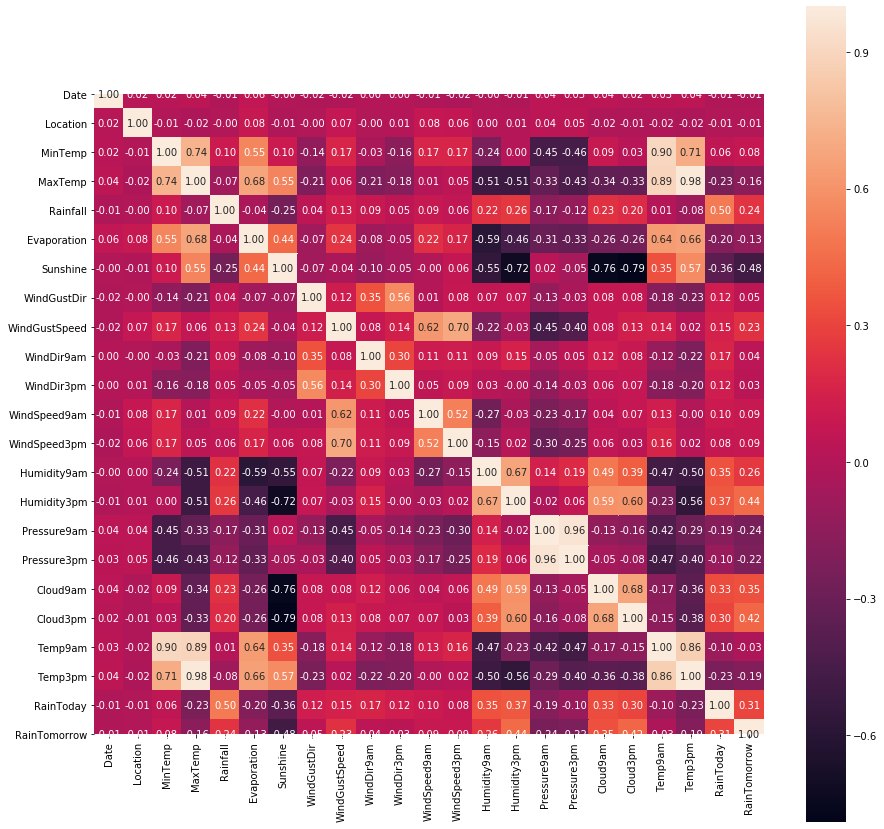

In [8]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(MiceImputed.corr(), square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)          
plt.show()

In [9]:
X = MiceImputed[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir','WindGustSpeed', 'WindDir9am', 
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 
       'Cloud3pm', 'Temp9am', 'Temp3pm','RainToday']]
y = MiceImputed['RainTomorrow']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
#Oversample the dataset

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=101)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))

print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (159050, 21)
After OverSampling, the shape of train_y: (159050,) 

Before OverSampling, counts of label '1': 22297
After OverSampling, counts of label '1': 79525
Before OverSampling, counts of label '0': 79525
After OverSampling, counts of label '0': 79525


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
c_values = [30, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=4, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_res, y_train_res)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.807501 using {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}


In [12]:
# Cross Validation
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l1', solver='liblinear', C=30)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train_res,y_train_res, scoring='accuracy', cv=5)
scores

array([0.80348947, 0.80625589, 0.80974536, 0.81178875, 0.80613015])

Accuracy = 0.8077134607452221
ROC Area under Curve = 0.8034786323612759
              precision    recall  f1-score   support

         0.0       0.93      0.81      0.87     34058
         1.0       0.54      0.80      0.65      9580

    accuracy                           0.81     43638
   macro avg       0.74      0.80      0.76     43638
weighted avg       0.85      0.81      0.82     43638



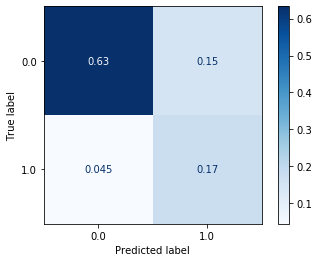

In [13]:
# Logistic Regression Model
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty='l1', solver='liblinear')
logreg.fit(X_train_res, y_train_res)
y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred) 
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc))

print(classification_report(y_test, y_pred))

plot_confusion_matrix(logreg, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')

Accuracy = 0.8788899582932307
ROC Area under Curve = 0.7745049952242834
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.93     34058
         1.0       0.81      0.59      0.68      9580

    accuracy                           0.88     43638
   macro avg       0.85      0.77      0.80     43638
weighted avg       0.87      0.88      0.87     43638



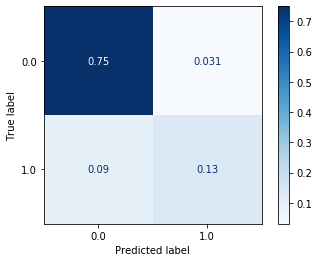

In [14]:
rfc = RandomForestClassifier(max_features = 'sqrt', max_depth=16, min_samples_leaf =1, 
                             min_samples_split = 2, n_estimators = 250, random_state=101)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred) 
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc))

print(classification_report(y_test, y_pred))

plot_confusion_matrix(rfc, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')

Accuracy = 0.8286126770246116
ROC Area under Curve = 0.7302166199106987
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89     34058
         1.0       0.62      0.55      0.59      9580

    accuracy                           0.83     43638
   macro avg       0.75      0.73      0.74     43638
weighted avg       0.82      0.83      0.82     43638



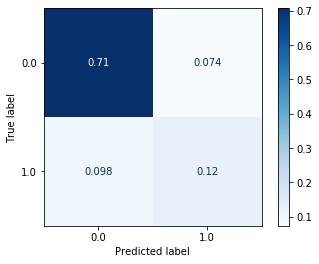

In [15]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=16, max_features='sqrt')
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred) 
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc))

print(classification_report(y_test, y_pred))

plot_confusion_matrix(dtc, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')

Accuracy = 0.8286126770246116
ROC Area under Curve = 0.7302166199106987
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89     34058
         1.0       0.62      0.55      0.59      9580

    accuracy                           0.83     43638
   macro avg       0.75      0.73      0.74     43638
weighted avg       0.82      0.83      0.82     43638



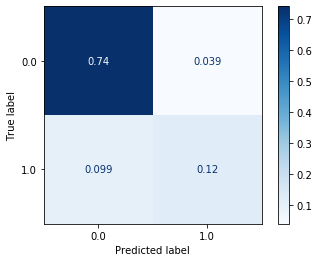

In [16]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic')
xgb.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred) 
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc))

print(classification_report(y_test, y_pred))

plot_confusion_matrix(xgb, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')